In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython import display
import pandas as pd
# pd.options.display.max_rows = 999
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

- In this exercises, we will introduce another popular metrics for model validation: AUC-ROC curve. 
- AUC stands for <b>Area Under Curve</b> while ROC stands for <b>Receiver Operating Charateristics</b>. 
- ROC curve has <b>true positive rate as y-axis</b> and <b>false positive rate as x-axis</b>, where true positive rate and false positive rate are defined by: <br><br>
$$\text{True Postive Rate (TPR)} = \frac{TP}{TP+FN}$$<br>
$$\text{False Postive Rate (FPR)} = \frac{FP}{FP+TN}$$<br>
- I.e., true positive rate measures the proportion of correct positive classification over all positive samples, while false positive rate measures the proportion of incorrect positive classification over all negative samples.
- The curve is drawn over different <b>decision thresholds</b> of a model. Decision threshold is the probability value that determines the class a predication belongs to. The default value is 0.5 in sklearn models' predictions.
- We prefer a model with <b>larger AUC</b> over others.

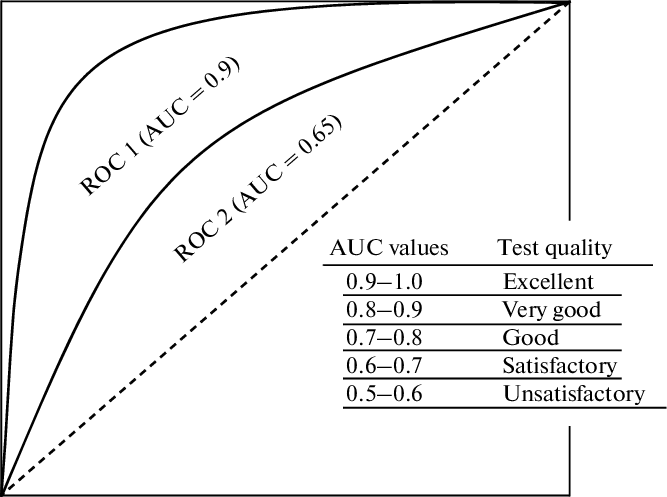

In [2]:
# examples of roc auc
display.Image('img/5_roc_auc.png', width=500)

# Load wine dataset
- The wine recognition dataset contains results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
- We are going to compare models which classify wines grown from which cultivars according to 13 given constituents.
- Load the wine dataset from sklearn and put data, feature_names and target into a dataframe df.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Split data
- Set X to be dataframe with all feature columns
- Set y to be series of target column
- Using sklearn label_binarize, convert y to one-vs-all format.

In [4]:
from sklearn.preprocessing import label_binarize


- Using sklearn train_test_split, split the data into train and test set, set test_size=.2 and random_state=42.

In [5]:
# train test split
from sklearn.model_selection import train_test_split


# Model fitting and prediction
- The basic form of AUC-ROC curve handle binary classification but our dataset contains 3 target classes. 
- For multiclass classification, there are generally two choices for evaluating AUC: <b>one-vs-one</b> and <b>one-vs-rest</b>.
- One-vs-one means that <b>for each pair of classes, it trains a classifier which regards one as positive while another as negative</b>. In this case $\frac{n(n-1)}{2}$ classifiers are trained. 
- One-vs-rest means that <b>for each class, it trains a classifier which regards all others classes as negative</b>. In this case $n$ classifiers are trained.
- For more about multiclass AUC, please check: https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case.
- By wrapping KNeighborsClassifier() with OneVsRestClassifier() in sklearn, train and test a kNN classifier, and store the predicted probabilities for later use. Print predict values and see what it looks like.

In [6]:
# knn classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier


- Repeat the above step with a linear SVM model, set probability=True and random_state=42.

In [7]:
# linear svm
from sklearn.svm import SVC


# Plot ROC curves and compare AUC values
- Using sklearn roc_curve and auc, compute ROC and AUC for kNN model.
- Define three dictionaries, namely knn_fpr, knn_tpr and knn_roc_auc to store TPR, FPR and auc value for each class.
- Loop over the three classes 0, 1 and 2. In each iteration, set parameters of roc_curve as y_true=ytest[:, i], y_score=ypred_proba[:, i].
- The function <b>roc_curve() computes thresholds that lead to changes in TPR/FPR based on the predicted probabilities of the model</b>, it returns TPR, FPR and thresholds at changing points.
- One can refer to example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html.

In [8]:
# knn roc curve for each class
from sklearn.metrics import roc_curve, auc


- Compute <b>micro-average</b> ROC curve and AUC of kNN model.
- Micro-averaging sums up true positive, false positive, true negative and false negative of all classes.
- Flatten ytest and ypred_proba as y_true and y_test parameters in roc_curve().

In [9]:
# roc, auc of micro-averaging


- Plot four ROC curves for kNN model, one for each class and one for micro-averaging.

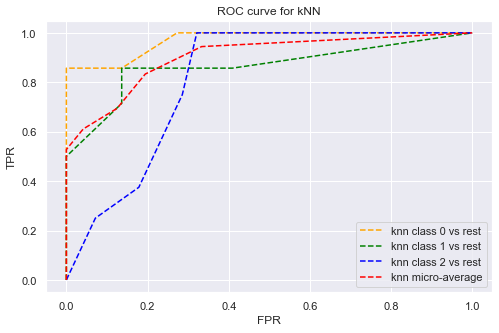

In [10]:
# knn plot roc curves


- Repeat the same steps with SVM.

In [11]:
# svm roc curve for each class
from sklearn.metrics import roc_curve, auc


In [12]:
# roc, auc of micro-averaging


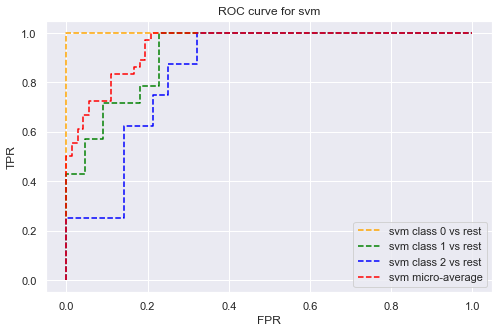

In [13]:
# svm plot roc curves


- Compare AUC values of both models and decide which one is better.

In [14]:
# print auc for both models


knn micro-average AUC =  0.9027777777777779
svm micro-average AUC =  0.9483024691358024


- Both models perform the worst on class 2.
- On average SVM is a stronger model.
- One could also compute and compare macro-average AUC of both models (how?). SVM is still better in this case.

# Notes
- So <b>when to use ROC-AUC metrics</b> for model evaulation?
- When your dataset is highly <b>imbalanced</b> (which will be discussed more at lesson 6.1), the model trained usually biased towards the majority class and the optimal threshold for the model varies (most likely not 0.5 anymore). Since model performance depends highly on threshold chosen in this case, using ROC AUC which consider performance over varying threshold is more suitable.